## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset (taken from https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)
mouse_study_data = pd.merge(mouse_metadata, study_results,how = "outer", on=['Mouse ID'])
# Display the data table for preview
mouse_study_data.head(500)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
495,a366,Stelasyn,Female,16,29,5,48.951368,0
496,a366,Stelasyn,Female,16,29,10,53.523990,0
497,a366,Stelasyn,Female,16,29,15,55.265582,0
498,a366,Stelasyn,Female,16,29,20,57.285987,0


In [3]:
# Checking the number of mice.
mouse_count = mouse_metadata["Mouse ID"].count()
mouse_count

249

In [4]:
mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#for each mouse id if timepoint is similar to last one add row to that table 
#found at (https://stackoverflow.com/questions/46640945/grouping-by-multiple-columns-to-find-duplicate-rows-pandas)
#finding any mice that have duplicate timepoint data
duplicated_mice = mouse_study_data.loc[mouse_study_data.duplicated(subset=['Mouse ID','Timepoint']), 'Mouse ID'].unique()
duplicated_mice


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 



In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#https://stackoverflow.com/questions/27965295/dropping-rows-from-dataframe-based-on-a-not-in-condition
cleaned_dataframe = mouse_study_data[~mouse_study_data['Mouse ID'].isin(duplicated_mice)]
cleaned_dataframe.head(90)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
85,j913,Ramicane,Female,4,17,0,45.000000,0
86,j913,Ramicane,Female,4,17,5,44.014900,0
87,j913,Ramicane,Female,4,17,10,44.497162,0
88,j913,Ramicane,Female,4,17,15,45.252534,0


In [8]:
# Checking the number of mice in the clean DataFrame.
num=cleaned_dataframe["Mouse ID"].count()
num

1880

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_data = cleaned_dataframe.groupby(["Drug Regimen"])

grouped_mean = grouped_data["Tumor Volume (mm3)"].mean()
grouped_median= grouped_data["Tumor Volume (mm3)"].median()
grouped_variance = grouped_data["Tumor Volume (mm3)"].var()
grouped_std = grouped_data["Tumor Volume (mm3)"].std()
grouped_sem = grouped_data["Tumor Volume (mm3)"].sem()
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean":grouped_mean,
                           "Median": grouped_median,
                           "Variance":grouped_variance,
                           "Standard Deviation":grouped_std,
                           "SEM":grouped_sem
                          })
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Trials')

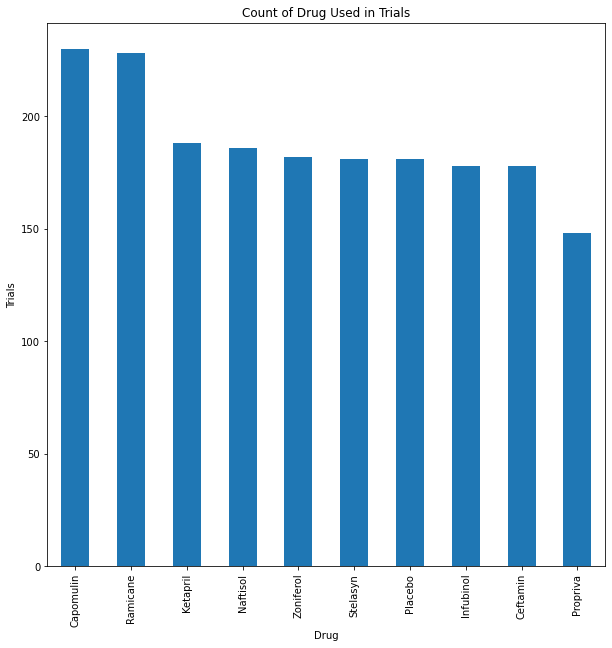

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_samples = cleaned_dataframe["Drug Regimen"].value_counts()

total_samples
total_samples.plot(kind="bar", figsize=(10,10))
plt.title("Count of Drug Used in Trials")
plt.xlabel("Drug")
plt.ylabel("Trials")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

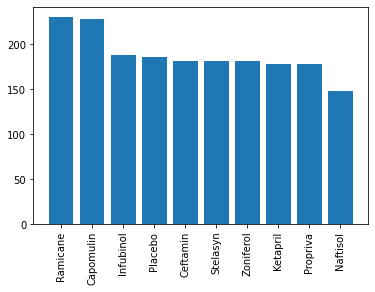

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#list of drug names
drug_names= cleaned_dataframe["Drug Regimen"].unique()
drug_names
plt.bar(drug_names, total_samples)
plt.xticks(rotation=90)


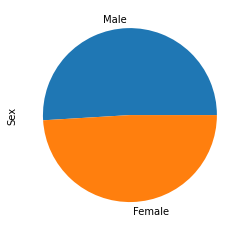

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_vs_female= cleaned_dataframe["Sex"].value_counts()
male_vs_female.plot(kind="pie")


([<matplotlib.patches.Wedge at 0x2db4c019370>,
 [Text(-0.03608946990830779, 1.1994571897995099, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.021052190779846207, 0.6996833607163808, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

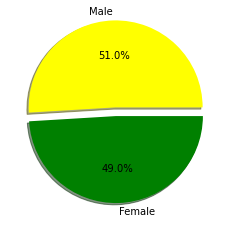

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
names = cleaned_dataframe["Sex"].unique()
colors = ["yellow","green"]
explode = (0.1,0)
plt.pie(male_vs_female, explode=explode,labels = names, colors=colors,
        autopct="%1.1f%%", shadow=True)


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
each_mouse = cleaned_dataframe.loc[cleaned_dataframe["Timepoint"]==45]
each_mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
drug_names= cleaned_dataframe["Drug Regimen"].unique()
drug_names
# Create empty list to fill with tumor vol data (for plotting)
list_for_plotting = []
each_mouse_volume = each_mouse["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = each_mouse_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume  is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of tumor volume is: 40.6583443125
The upper quartile of tumor volume is: 68.8702959775
The interquartile range of tumor volume is: 28.211951665000008
The the median of tumor volume  is: 63.53754596 
Values below -1.6595831850000096 could be outliers.
Values above 111.18822347500002 could be outliers.


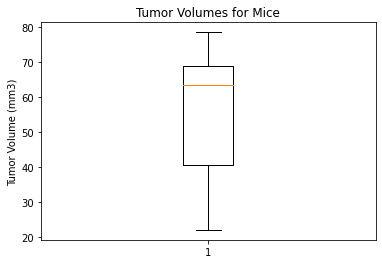

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes for Mice')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(each_mouse_volume)
plt.show()

## Line and Scatter Plots

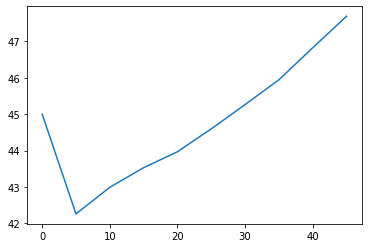

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
431,i557,Capomulin,Female,1,24,0,45.000000,0
432,i557,Capomulin,Female,1,24,5,42.261665,0
433,i557,Capomulin,Female,1,24,10,42.992077,0
434,i557,Capomulin,Female,1,24,15,43.529876,0
435,i557,Capomulin,Female,1,24,20,43.967895,0
436,i557,Capomulin,Female,1,24,25,44.596219,0
437,i557,Capomulin,Female,1,24,30,45.261384,0
438,i557,Capomulin,Female,1,24,35,45.941949,0
439,i557,Capomulin,Female,1,24,40,46.821070,1
440,i557,Capomulin,Female,1,24,45,47.685963,1


In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#found at https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

capomulin_t_f = cleaned_dataframe['Drug Regimen']=="Capomulin"
capomulin = cleaned_dataframe[capomulin_t_f]
cap_mouse1 = capomulin["Mouse ID"] == "i557" 
cap_mouse = capomulin[cap_mouse1]
cap_tum = cap_mouse["Tumor Volume (mm3)"]
cap_tim = cap_mouse["Timepoint"]
plt.plot(cap_tim, cap_tum)
plt.set_xlabel("")
plt.show()
cap_mouse


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
